# Important module and library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset

In [20]:
dataset = pd.read_csv('price_prediction.csv')
dataset

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2.010000e+11,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,2.010000e+11,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2.020000e+11,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2.010000e+11,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,2.020000e+11,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.010000e+11,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21609,2.020000e+11,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21610,2.010000e+11,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21611,2.020000e+11,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


# CHECKING NULL

In [21]:
dataset.isnull().any()

date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

# Adding Columns into Index

In [22]:
dataset.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

# Dividing Dataset in to x-array & y-array

In [24]:
X = dataset[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'long', 'sqft_lot15']]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,long,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,-122.257,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,-122.319,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,-122.233,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,-122.393,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,-122.045,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,-122.346,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,-122.362,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,-122.299,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,-122.069,1287


In [25]:
Y = dataset['price']
Y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

# Split Dataset for Train and Test

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=10)

 

In [27]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,long,sqft_lot15
5098,3,2.25,2110,11319,2.0,0,0,4,8,2110,0,1978,0,98072,47.7420,-122.105,-122.105,11319
17829,3,2.50,1350,2053,3.0,0,0,3,8,1350,0,2005,0,98117,47.6758,-122.386,-122.386,4150
6888,4,2.50,2760,5564,2.0,0,0,3,7,2760,0,2001,0,98056,47.4814,-122.189,-122.189,5626
7964,4,2.50,2680,9185,2.0,0,0,3,9,2680,0,1989,0,98029,47.5738,-121.992,-121.992,8505
17394,1,0.75,480,9750,1.0,0,0,2,4,480,0,1948,0,98146,47.4982,-122.362,-122.362,9924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,3,2.00,1850,8208,1.0,0,0,4,7,1180,670,1970,0,98023,47.3109,-122.362,-122.362,8174
7291,3,1.75,2190,7021,1.0,0,2,4,7,1390,800,1953,0,98178,47.5033,-122.232,-122.232,7155
17728,4,1.50,1580,10260,1.0,0,0,4,7,1030,550,1955,0,98007,47.5984,-122.147,-122.147,7000
7293,3,2.00,1410,6600,1.0,0,0,4,7,1410,0,1990,0,98042,47.3596,-122.089,-122.089,7150


In [28]:
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,long,sqft_lot15
957,3,1.75,2100,14850,1.0,0,0,4,7,2100,0,1963,0,98042,47.3622,-122.059,-122.059,17238
14143,4,2.00,2230,5000,1.5,0,0,4,7,1510,720,1922,0,98144,47.5772,-122.292,-122.292,5000
19452,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,-121.888,22850
20510,3,2.50,1390,1411,3.0,0,0,3,8,1390,0,2008,0,98103,47.6485,-122.334,-122.334,1266
18354,4,2.00,1700,2350,1.0,0,0,3,6,850,850,1926,2014,98117,47.6865,-122.366,-122.366,4160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18435,3,1.50,1390,5040,1.0,0,0,3,7,1090,300,1947,0,98105,47.6611,-122.282,-122.282,4800
5508,3,2.25,1790,9580,2.0,0,0,3,8,1790,0,1984,0,98006,47.5541,-122.162,-122.162,9995
18067,4,2.00,1880,3840,1.0,0,0,3,7,970,910,1904,0,98144,47.5929,-122.303,-122.303,1820
13245,4,2.00,1640,5000,2.0,0,0,3,7,1640,0,1907,1983,98107,47.6662,-122.365,-122.365,5000


In [29]:
y_train

5098     479000.0
17829    477000.0
6888     424950.0
7964     620000.0
17394    145000.0
           ...   
9372     245000.0
7291     353000.0
17728    475000.0
7293     279900.0
17673    217500.0
Name: price, Length: 15129, dtype: float64

In [30]:
y_test

957      323000.0
14143    690000.0
19452    142000.0
20510    560000.0
18354    545000.0
           ...   
18435    589000.0
5508     578000.0
18067    435000.0
13245    492000.0
15483    480000.0
Name: price, Length: 6484, dtype: float64

# Train dataset using model/algorithm 

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

# Each model’s coefficients

In [32]:
 model.coef_


array([-3.42993425e+04,  3.77412536e+04,  1.09348623e+02,  4.25495912e-02,
       -7.08944562e+02,  5.60123527e+05,  5.41186541e+04,  2.63863470e+04,
        1.06018038e+05,  7.45783281e+01,  3.47702950e+01, -2.52897182e+03,
        1.37961796e+01, -5.76040957e+02,  5.94840014e+05, -1.02908722e+05,
       -1.02908722e+05, -2.84908060e-01])

# Intercept of the regression equation

In [33]:
model.intercept_

7325000.03976622

In [34]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])


,Coeff
bedrooms,-34299.342531
bathrooms,37741.253576
sqft_living,109.348623
sqft_lot,0.042550
floors,-708.944562
waterfront,560123.526507
view,54118.654072
condition,26386.347046
grade,106018.037748
sqft_above,74.578328


# Making Predictions From Test Dataset

In [35]:
predictions = model.predict(x_test)
predictions

array([ 371303.01992766,  565178.56386948, -565899.75701447, ...,
        525189.85290955,  613153.97876295,  551280.00968589])

# Accuracy of The Model

In [37]:
model.score(x_test, y_test)

0.710082869431908

# Scatterplot

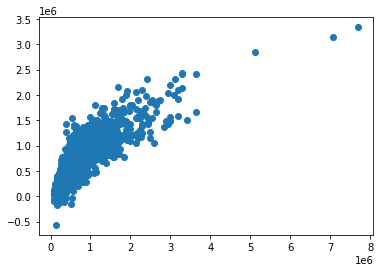

In [38]:
plt.scatter(y_test, predictions)


# Visualization

(array([2.200e+01, 4.106e+03, 2.261e+03, 7.800e+01, 1.200e+01, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-1044605.97049334,  -503803.11513712,    36999.74021909,
          577802.59557531,  1118605.45093152,  1659408.30628773,
         2200211.16164395,  2741014.01700016,  3281816.87235637,
         3822619.72771259,  4363422.5830688 ]),
 <BarContainer object of 10 artists>)

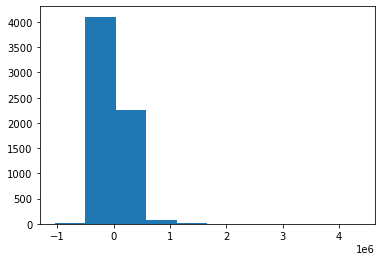

In [39]:
plt.hist(y_test - predictions)
